In [38]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
data = pdr.get_data_yahoo('AMZN','2010-1-1','2021-5-1')
data2 = pdr.get_data_yahoo('TATAMOTORS.NS', '2014-3-1', '2020-3-1')

In [39]:
data.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-29,3514.449951,3435.0,3505.100098,3471.310059,7682400,3471.310059
2021-04-30,3554.000000,3462.5,3525.120117,3467.419922,7001800,3467.419922


# Amazon Line chart

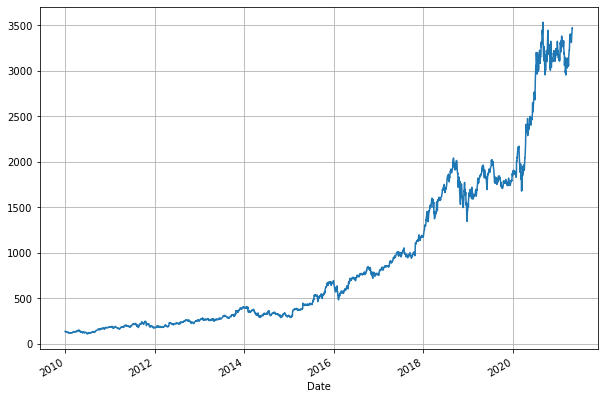

In [40]:
data['Adj Close'].plot(figsize=(10,7), grid =True)
plt.show()

In [41]:
len(data)

2852

In [42]:
data['overnight_returns'] = (data['Open']-data['Close'].shift(1))/data['Close'].shift(1)

data['intraday_returns'] = (data['Close']-data['Open'])/data['Open']


In [43]:
data

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns
Date,,,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,NaN,-0.018747
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,0.012861,-0.017248
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,-0.003510,0.009443
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-0.000668,-0.017459
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,-0.001815,-0.015226
...,...,...,...,...,...,...,...,...
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000,0.002131,0.018220
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932,0.010111,-0.007562
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000,0.005083,0.006900


In [44]:
data["positive_overnights"]= np.where(data.overnight_returns >0 ,1 ,0)

In [45]:
data["positive_intraday"] = np.where(data.intraday_returns>0,1,0)

In [46]:
data.loc[data.positive_overnights==1].describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday
count,1627.000000,1627.000000,1627.000000,1627.000000,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.0,1627.000000
mean,991.079224,969.573909,981.235237,980.846680,4.485014e+06,980.846680,0.007124,0.000308,1.0,0.502766
std,928.791521,906.709964,918.683108,918.009447,2.578581e+06,918.009447,0.011189,0.015601,0.0,0.500146
min,112.529999,109.000000,110.650002,110.059998,8.813000e+05,110.059998,0.000025,-0.085615,1.0,0.000000
25%,265.935013,260.254990,262.199997,263.285004,2.881450e+06,263.285004,0.002293,-0.008386,1.0,0.000000
50%,619.849976,598.570007,612.479980,608.609985,3.868900e+06,608.609985,0.004584,0.000045,1.0,1.000000
75%,1677.005005,1636.099976,1662.344971,1663.869995,5.287300e+06,1663.869995,0.008452,0.009480,1.0,1.000000
max,3554.000000,3486.689941,3547.000000,3531.449951,2.947130e+07,3531.449951,0.200776,0.081768,1.0,1.000000


In [47]:
data.loc[data.positive_intraday==1].describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday
count,1431.000000,1431.000000,1431.000000,1431.000000,1.431000e+03,1431.000000,1431.000000,1431.000000,1431.000000,1431.0
mean,935.016610,914.872222,920.102006,930.438784,4.538677e+06,930.438784,0.001015,0.011832,0.571628,1.0
std,905.289278,884.669891,889.953069,900.290358,2.769480e+06,900.290358,0.013439,0.010749,0.495016,0.0
min,111.690002,105.800003,105.930000,109.260002,9.844000e+05,109.260002,-0.117765,0.000006,0.000000,1.0
25%,249.075005,243.150002,245.375000,247.880005,2.903400e+06,247.880005,-0.003367,0.004232,0.000000,1.0
50%,524.450012,511.660004,515.150024,521.099976,3.860000e+06,521.099976,0.001161,0.009410,1.000000,1.0
75%,1623.315002,1591.434998,1601.655029,1615.039978,5.294400e+06,1615.039978,0.005333,0.016121,1.000000,1.0
max,3513.870117,3467.000000,3489.580078,3499.120117,4.242110e+07,3499.120117,0.147150,0.122156,1.000000,1.0


In [48]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday
count,2852.000000,2852.000000,2852.000000,2852.000000,2.852000e+03,2852.000000,2851.000000,2852.000000,2852.000000,2852.000000
mean,936.984932,916.097111,927.159551,926.896290,4.539156e+06,926.896290,0.001074,0.000269,0.570477,0.501753
std,907.279435,885.462524,897.151265,896.388565,2.760813e+06,896.388565,0.013135,0.015752,0.495095,0.500085
min,111.290001,105.800003,105.930000,108.610001,8.813000e+05,108.610001,-0.117765,-0.085615,0.000000,0.000000
25%,252.474998,245.772499,248.445000,248.550003,2.861000e+06,248.550003,-0.003284,-0.008223,0.000000,0.000000
50%,529.209991,515.204987,522.614990,522.304993,3.864800e+06,522.304993,0.001086,0.000039,1.000000,1.000000
75%,1622.929993,1590.757477,1604.000000,1602.950012,5.336350e+06,1602.950012,0.005206,0.009421,1.000000,1.000000
max,3554.000000,3486.689941,3547.000000,3531.449951,4.242110e+07,3531.449951,0.200776,0.122156,1.000000,1.000000


# Allocating value and finding the cumulative returns

In [49]:
data["Cumumlative_overnight"]= (1+data["overnight_returns"]).cumprod()
data["Cumumlative_intraday"]= (1+data["intraday_returns"]).cumprod()

In [50]:
data

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday,Cumumlative_overnight,Cumumlative_intraday
Date,,,,,,,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004,NaN,-0.018747,0,0,NaN,0.981253
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994,0.012861,-0.017248,1,0,1.012861,0.964329
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002,-0.003510,0.009443,0,1,1.009305,0.973435
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000,-0.000668,-0.017459,0,0,1.008631,0.956440
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000,-0.001815,-0.015226,0,0,1.006800,0.941877
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,3428.449951,3330.939941,3348.000000,3409.000000,4880700,3409.000000,0.002131,0.018220,1,1,16.022905,1.551958
2021-04-27,3460.000000,3398.010010,3443.469971,3417.429932,3827100,3417.429932,0.010111,-0.007562,1,0,16.184920,1.540222
2021-04-28,3489.879883,3425.000000,3434.800049,3458.500000,4631900,3458.500000,0.005083,0.006900,1,1,16.267185,1.550849


Allocating 10,000 units

In [51]:
data["Cumumlative_overnight"]= data["Cumumlative_overnight"]*10000
data["Cumumlative_intraday"]= data["Cumumlative_intraday"]*10000

In [52]:
data.tail(3)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday,Cumumlative_overnight,Cumumlative_intraday
Date,,,,,,,,,,,,
2021-04-28,3489.879883,3425.0,3434.800049,3458.500000,4631900,3458.500000,0.005083,0.006900,1,1,162671.851838,15508.493220
2021-04-29,3514.449951,3435.0,3505.100098,3471.310059,7682400,3471.310059,0.013474,-0.009640,1,0,164863.705006,15358.987478
2021-04-30,3554.000000,3462.5,3525.120117,3467.419922,7001800,3467.419922,0.015501,-0.016368,1,0,167419.318154,15107.587087


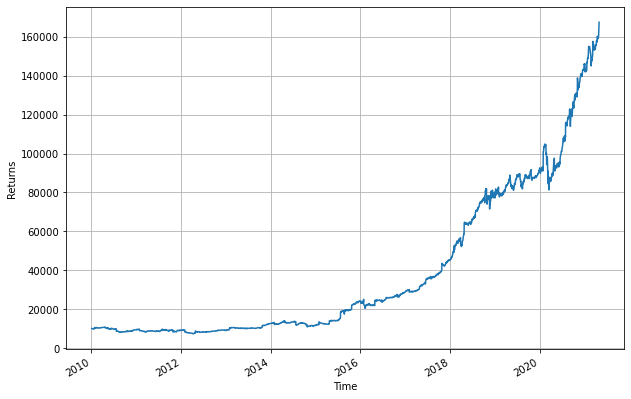

In [53]:
data["Cumumlative_overnight"].plot(figsize=(10,7), grid =True)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

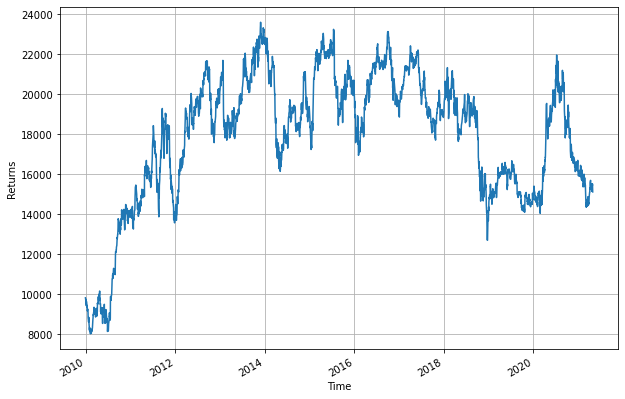

In [54]:
data["Cumumlative_intraday"].plot(figsize=(10,7), grid =True)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

In [55]:
!pip install pyfolio

Start date,2009-12-31
End date,2021-04-30
Total months,135
,Backtest
Annual return,28.3%
Cumulative returns,1574.2%
Annual volatility,20.9%
Sharpe ratio,1.30
Calmar ratio,0.88
Stability,0.91
Max drawdown,-32.1%


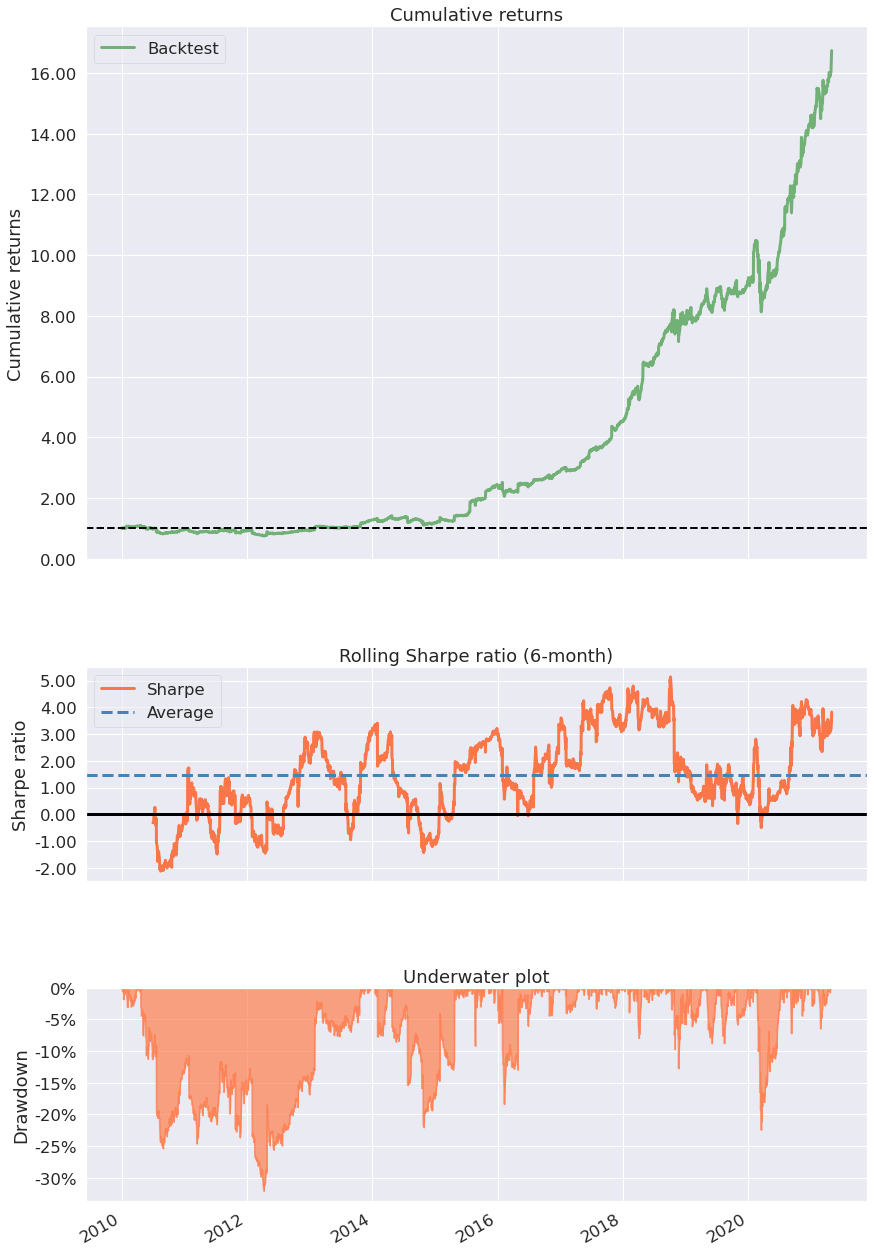

In [56]:
import pyfolio as pf
pf.create_simple_tear_sheet(data['overnight_returns'])

Start date,2009-12-31
End date,2021-04-30
Total months,135
,Backtest
Annual return,3.7%
Cumulative returns,51.1%
Annual volatility,25.0%
Sharpe ratio,0.27
Calmar ratio,0.08
Stability,0.09
Max drawdown,-46.2%


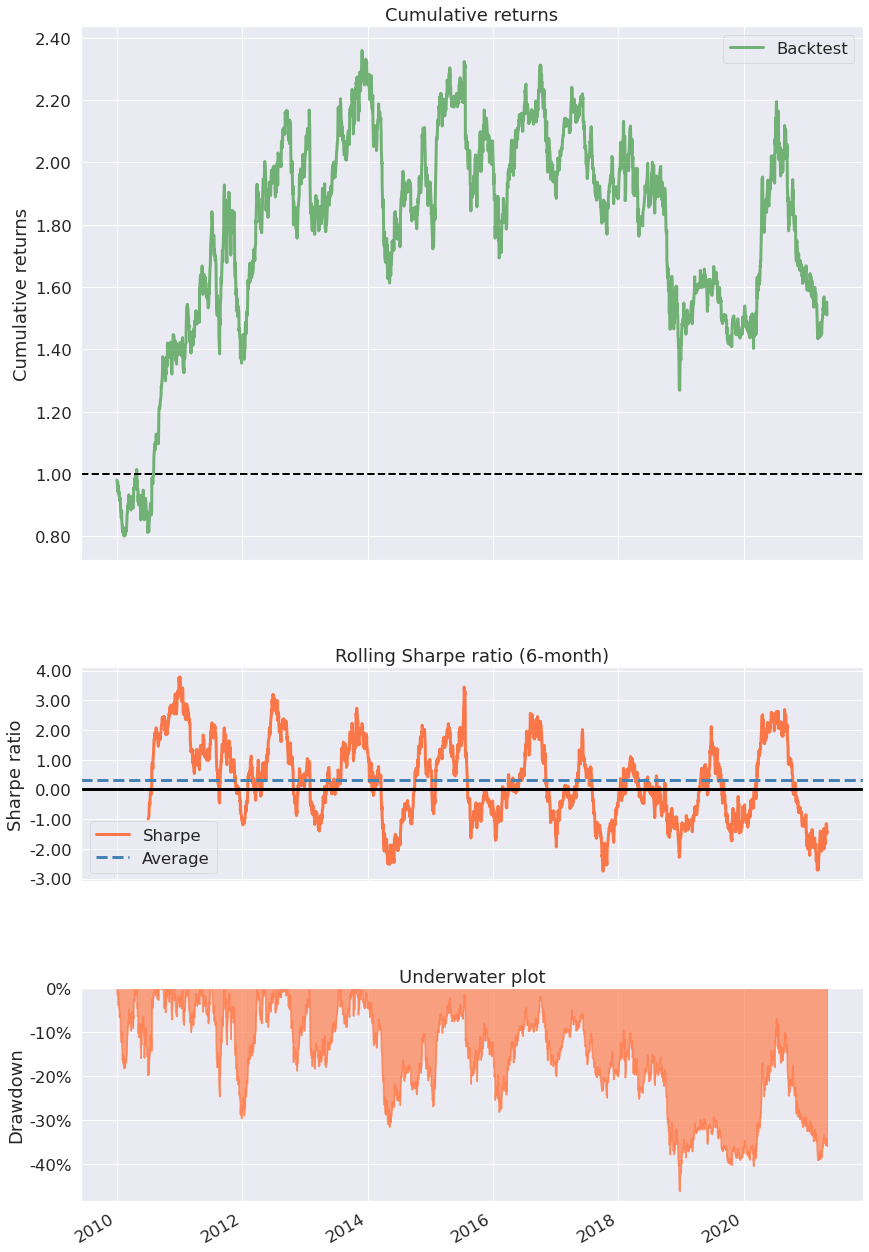

In [57]:
pf.create_simple_tear_sheet(data['intraday_returns'])

# Apple Line Chart

In [58]:
data2.tail(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-27,146.750000,141.100006,144.149994,145.250000,51328153.0,145.250000
2020-02-28,139.600006,127.050003,138.850006,128.949997,94469619.0,128.949997


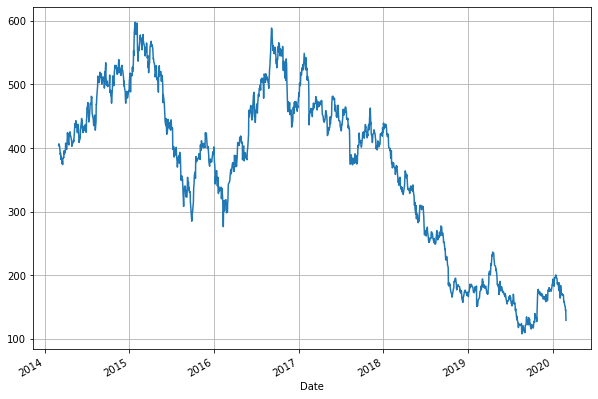

In [59]:
data2['Adj Close'].plot(figsize=(10,7), grid =True)
plt.show()

In [60]:
data2['overnight_returns'] = (data2['Open']-data2['Close'].shift(1))/data2['Close'].shift(1)

data2['intraday_returns'] = (data2['Close']-data2['Open'])/data2['Open']


In [61]:
data2["positive_overnights"]= np.where(data2.overnight_returns >0 ,1 ,0)
data2["positive_intraday"] = np.where(data2.intraday_returns>0,1,0)

In [62]:
data2.loc[data2.positive_overnights==1].describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday
count,920.000000,920.000000,920.000000,920.000000,9.200000e+02,920.000000,920.000000,920.000000,920.0,920.000000
mean,374.117460,363.763279,369.357958,368.686380,1.320080e+07,368.518798,0.007360,-0.001635,1.0,0.432609
std,132.848775,130.634478,131.894752,131.738296,1.576806e+07,131.655071,0.009564,0.021061,0.0,0.495707
min,111.599998,106.800003,108.900002,110.550003,1.154721e+06,110.550003,0.000090,-0.086769,1.0,0.000000
25%,261.375008,255.875000,259.362511,258.175003,5.356345e+06,258.175003,0.002885,-0.013774,1.0,0.000000
50%,405.399994,396.524994,401.841492,401.899994,7.724076e+06,401.737305,0.005391,-0.003475,1.0,0.000000
75%,474.564438,462.137505,468.579964,468.989861,1.380042e+07,468.847473,0.009339,0.008883,1.0,1.000000
max,605.901123,589.873047,600.212097,598.134399,1.844356e+08,597.892273,0.197477,0.135286,1.0,1.000000


In [63]:
data2.loc[data2.positive_intraday==1].describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday
count,620.000000,620.000000,620.000000,620.000000,6.200000e+02,620.000000,620.000000,620.000000,620.000000,620.0
mean,376.593651,365.562644,368.142433,373.563825,1.409659e+07,373.373895,0.002213,0.016290,0.641935,1.0
std,132.024071,129.693095,130.325615,131.376218,1.708374e+07,131.285160,0.014711,0.016507,0.479818,0.0
min,111.599998,107.650002,108.900002,111.050003,9.445510e+05,111.050003,-0.099908,0.000113,0.000000,1.0
25%,269.262505,258.437492,260.525002,266.575005,5.554798e+06,266.575005,-0.001912,0.004803,0.000000,1.0
50%,411.618195,400.306305,403.300003,408.009109,8.067473e+06,406.975098,0.002826,0.011233,1.000000,1.0
75%,474.100006,462.699997,466.844887,471.312500,1.483212e+07,471.312500,0.007255,0.022231,1.000000,1.0
max,605.901123,589.873047,591.307617,598.134399,1.844356e+08,597.892273,0.197477,0.135286,1.000000,1.0


In [64]:
data2.describe()

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday
count,1472.000000,1472.000000,1472.000000,1472.000000,1.472000e+03,1472.000000,1471.000000,1472.000000,1472.000000,1472.000000
mean,372.436608,361.760047,367.542051,366.745613,1.338872e+07,366.570014,0.001727,-0.002198,0.625000,0.421196
std,131.940308,129.601521,130.849848,130.787418,1.561377e+07,130.699662,0.012641,0.021565,0.484287,0.493919
min,111.599998,106.000000,108.900002,107.699997,0.000000e+00,107.699997,-0.099908,-0.103792,0.000000,0.000000
25%,260.699989,252.887501,258.500000,257.925011,5.437266e+06,257.925011,-0.002316,-0.014123,0.000000,0.000000
50%,405.250000,395.649994,400.775757,401.073395,7.841176e+06,400.543839,0.002343,-0.003427,1.000000,0.000000
75%,471.737511,461.037498,466.760796,466.187492,1.419901e+07,465.998756,0.006693,0.008699,1.000000,1.000000
max,605.901123,589.873047,600.212097,598.134399,1.844356e+08,597.892273,0.197477,0.135286,1.000000,1.000000


In [65]:
data2["Cumumlative_overnight"]= (1+data2["overnight_returns"]).cumprod()
data2["Cumumlative_intraday"]= (1+data2["intraday_returns"]).cumprod()

In [66]:
data2.tail(3)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday,Cumumlative_overnight,Cumumlative_intraday
Date,,,,,,,,,,,,
2020-02-26,147.899994,143.699997,146.899994,144.550003,47605927.0,144.550003,-0.020013,-0.015997,0,0,11.821308,0.029781
2020-02-27,146.750000,141.100006,144.149994,145.250000,51328153.0,145.250000,-0.002767,0.007631,0,1,11.788595,0.030008
2020-02-28,139.600006,127.050003,138.850006,128.949997,94469619.0,128.949997,-0.044062,-0.071300,0,0,11.269167,0.027869


In [67]:
data2.head(2)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday,Cumumlative_overnight,Cumumlative_intraday
Date,,,,,,,,,,,,
2014-03-03,410.595947,403.917572,410.595947,406.341583,6684037.0,404.448700,NaN,-0.010361,0,0,NaN,0.989639
2014-03-04,416.235443,401.493591,406.885742,408.518219,5615889.0,406.615173,0.001339,0.004012,1,1,1.001339,0.993609


In [68]:
data2["Cumumlative_overnight"]= data2["Cumumlative_overnight"]*10000
data2["Cumumlative_intraday"]= data2["Cumumlative_intraday"]*10000


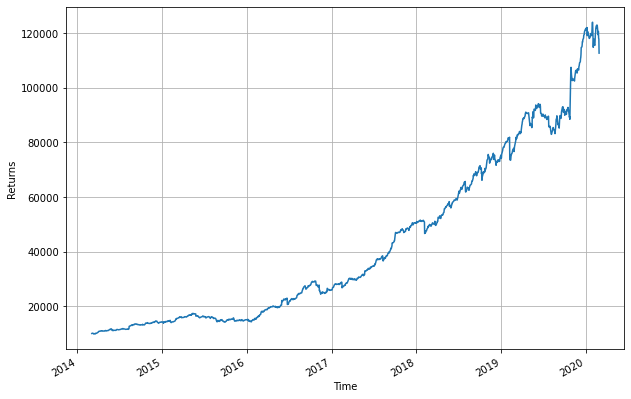

In [69]:
data2["Cumumlative_overnight"].plot(figsize=(10,7), grid =True)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

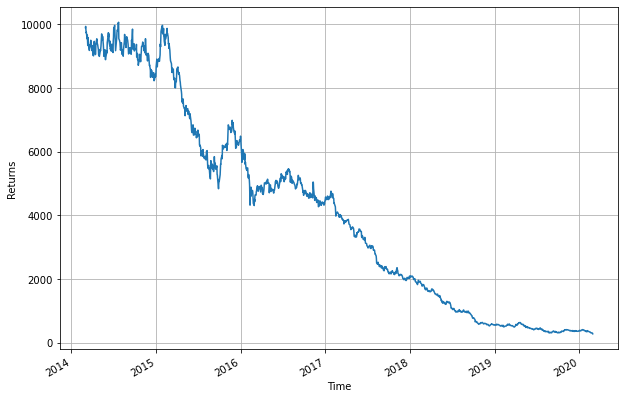

In [70]:
data2["Cumumlative_intraday"].plot(figsize=(10,7), grid =True)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.show()

In [71]:
data2.tail(2)

,High,Low,Open,Close,Volume,Adj Close,overnight_returns,intraday_returns,positive_overnights,positive_intraday,Cumumlative_overnight,Cumumlative_intraday
Date,,,,,,,,,,,,
2020-02-27,146.750000,141.100006,144.149994,145.250000,51328153.0,145.250000,-0.002767,0.007631,0,1,117885.950432,300.081646
2020-02-28,139.600006,127.050003,138.850006,128.949997,94469619.0,128.949997,-0.044062,-0.071300,0,0,112691.669102,278.685817


Start date,2014-03-03
End date,2020-02-28
Total months,70
,Backtest
Annual return,51.4%
Cumulative returns,1026.9%
Annual volatility,20.1%
Sharpe ratio,2.17
Calmar ratio,2.81
Stability,0.98
Max drawdown,-18.3%


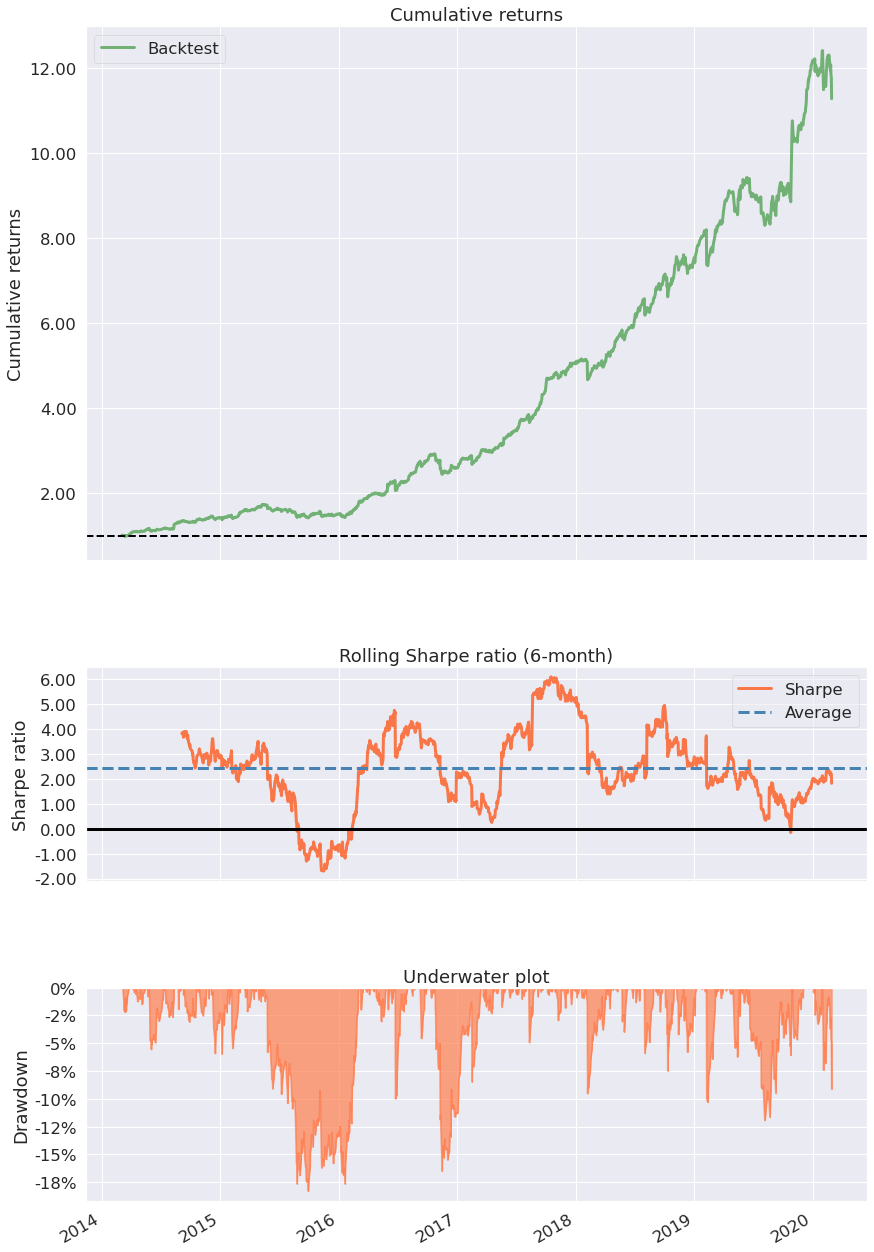

In [72]:
import pyfolio as pf
pf.create_simple_tear_sheet(data2['overnight_returns'])

Start date,2014-03-03
End date,2020-02-28
Total months,70
,Backtest
Annual return,-45.8%
Cumulative returns,-97.2%
Annual volatility,34.2%
Sharpe ratio,-1.62
Calmar ratio,-0.47
Stability,0.93
Max drawdown,-97.2%


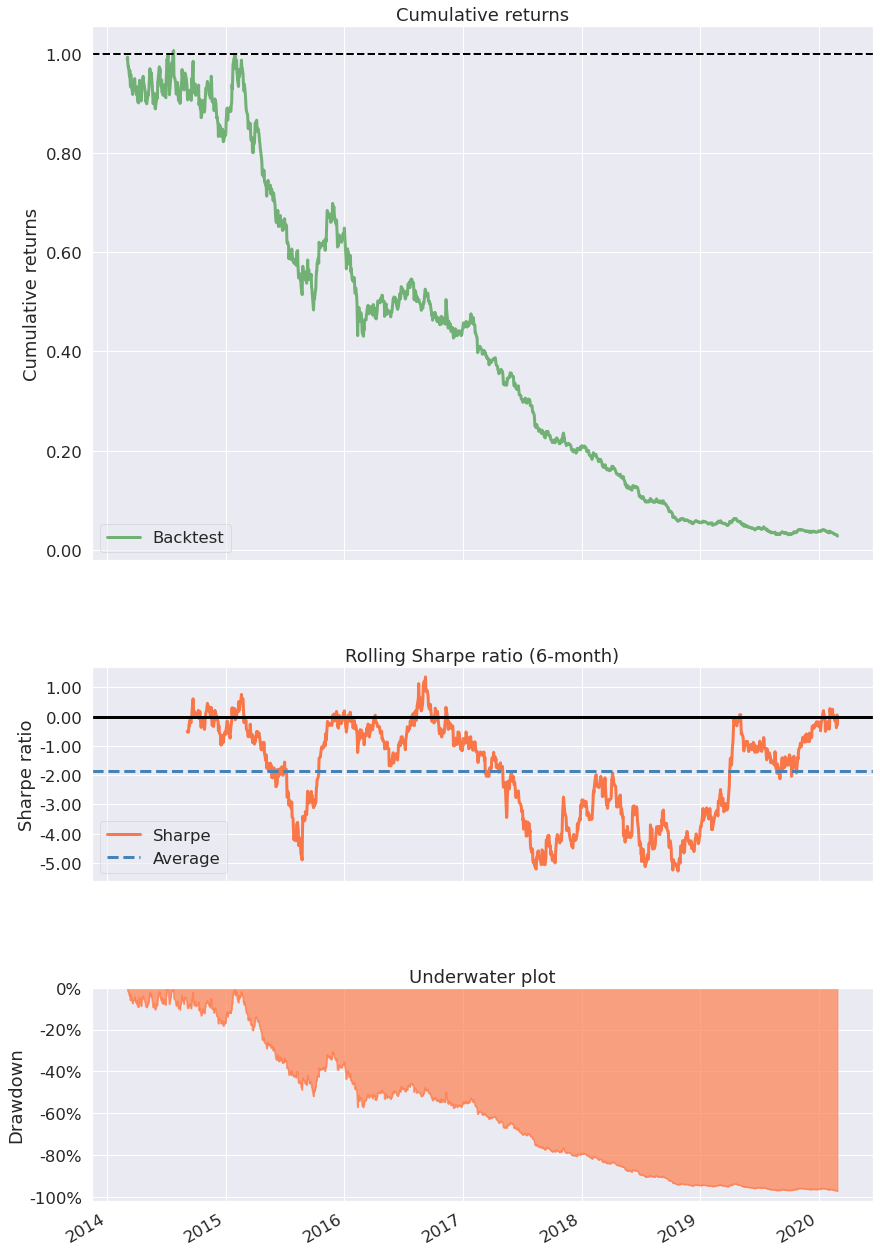

In [73]:
import pyfolio as pf
pf.create_simple_tear_sheet(data2['intraday_returns'])